# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [1]:
import tensorflow as tf

## Get the dataset

In [2]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [4]:
# Pre processing 
#X_train, X_test = X_train / 255.0, X_test / 255.0

## Visualize the dataset
Print some images with labels.

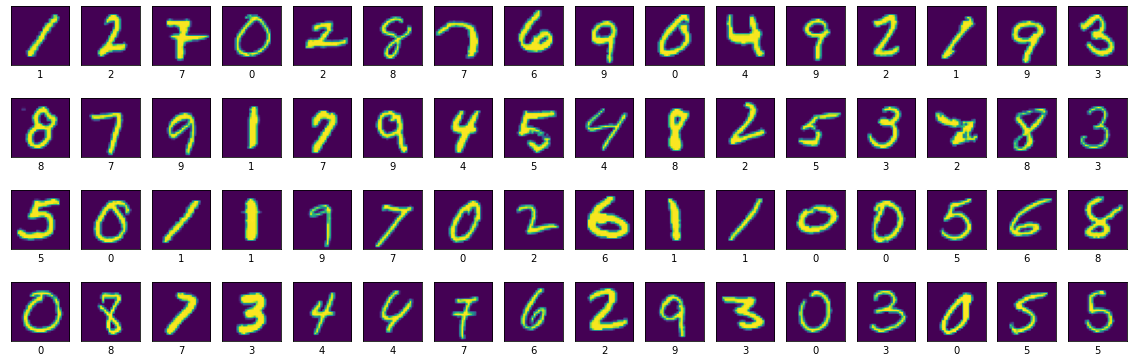

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(12,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(Y_train[i])
plt.show()
# Your code

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
(8000, 28, 28)
(2000, 28, 28)
(8000,)
(2000,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


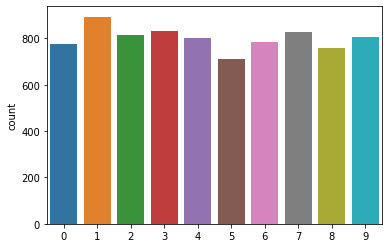

In [6]:
import numpy as np
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
import seaborn as sns
sns.countplot(Y_train)
# Your code

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


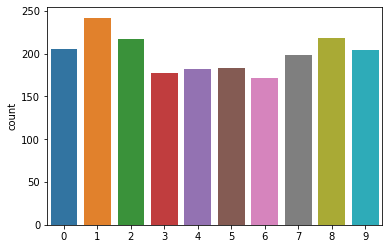

In [7]:
sns.countplot(Y_test)

## Model

In [8]:
# model building
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 512)               7930368   
                                                        

In [10]:
# Compile the model (add optimizers and metrics)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
# Fit the model on the training data (specify validation_split, read about validation if new to you)
history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


250/250 [==============================] - 15s 8ms/step - loss: 1.3298 - accuracy: 0.8919 - val_loss: 0.1790 - val_accuracy: 0.9515
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.1087 - accuracy: 0.9649 - val_loss: 0.1198 - val_accuracy: 0.9665
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0692 - accuracy: 0.9776 - val_loss: 0.0971 - val_accuracy: 0.9730
Epoch 4/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0847 - val_accuracy: 0.9775
Epoch 5/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0281 - accuracy: 0.9896 - val_loss: 0.0969 - val_accuracy: 0.9745
Epoch 6/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0324 - accuracy: 0.9906 - val_loss: 0.1237 - val_accuracy: 0.9680
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0388 - accuracy: 0.9886 - val_loss: 0.1325 - val_accuracy: 0.9740
Epoch 8/10
250/2

In [12]:
model.predict(X_test[:10])

array([[1.00000000e+00, 2.93211953e-15, 1.49114159e-11, 2.84451756e-14,
        1.93307047e-14, 2.94339333e-15, 3.95999317e-10, 7.72121353e-16,
        4.08826532e-12, 4.78394879e-10],
       [8.57768924e-18, 4.62119504e-18, 1.51340055e-17, 1.61241528e-12,
        2.05746106e-17, 1.00000000e+00, 1.13241621e-11, 9.04200895e-15,
        3.18887352e-08, 2.30541808e-08],
       [2.48357574e-05, 1.12001308e-05, 2.03722928e-04, 3.92818272e-01,
        1.05967295e-07, 7.64773722e-06, 1.27763371e-06, 1.84647632e-07,
        6.06918097e-01, 1.47032242e-05],
       [2.01063255e-09, 1.85979860e-11, 1.02474486e-13, 3.45650664e-09,
        1.35222866e-11, 9.99971390e-01, 2.19447629e-05, 2.07919437e-09,
        6.73326031e-06, 1.03912490e-09],
       [8.61780956e-16, 1.46690506e-17, 2.27635319e-15, 1.00000000e+00,
        6.80758156e-16, 8.14382114e-15, 9.02035991e-18, 2.17595099e-15,
        4.75342354e-14, 3.76960858e-11],
       [1.26864066e-07, 1.44780613e-03, 6.18927842e-08, 2.28360000e-06,
   

In [13]:
arr=model.predict(X_test[:64])
min=0.0
ar=[]
for i in range(0,64):
  min=arr[i,0]
  
  for j in range(0,10):
    if(arr[i,j]>min):
      min=arr[i,j]
  
  for j in range(0,10):
    if(arr[i,j]==min):
      ar.append(j) 

In [14]:
xx=model.evaluate(X_test,Y_test)
print(xx)

63/63 [==============================] - 0s 4ms/step - loss: 0.1108 - accuracy: 0.9750
[0.11083856225013733, 0.9750000238418579]


## Predict some images
Print the image along with its label (true value) and predicted value.

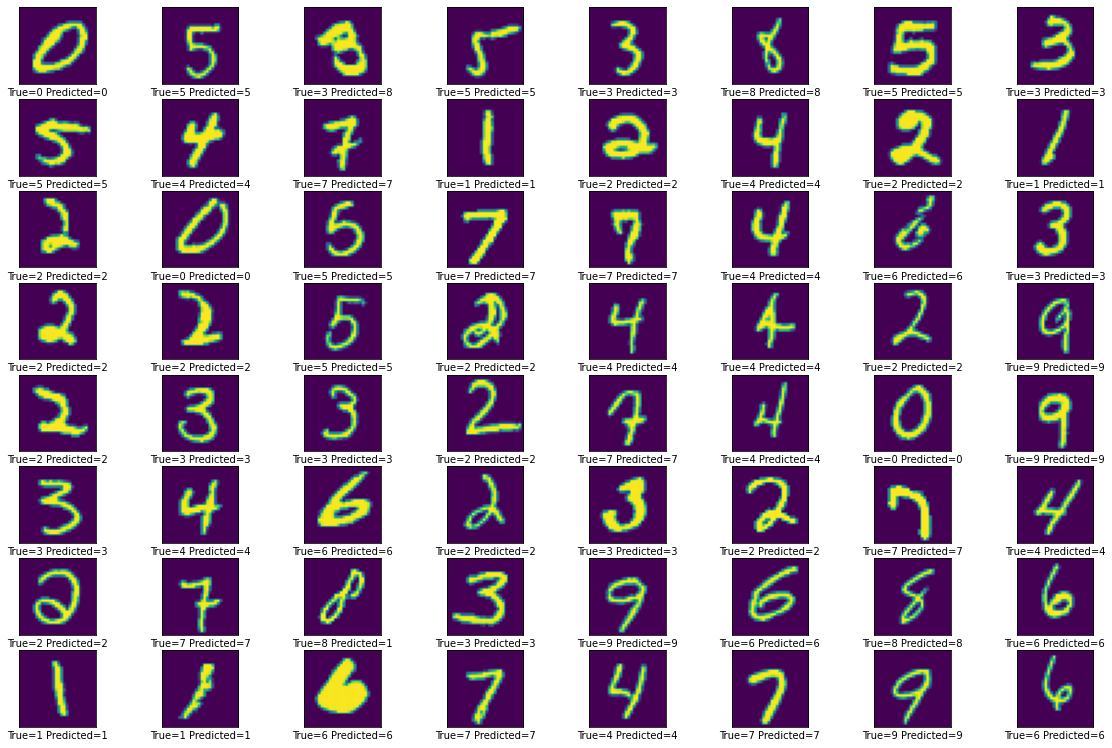

In [15]:
# Your code
plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(12,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(f"True={Y_test[i]} Predicted={ar[i]}")
plt.show()